In [1]:
import sys
sys.executable

'C:\\Users\\vietx\\anaconda3\\python.exe'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Khám phá dữ liệu

### Đọc dữ liệu từ file csv


In [3]:
billboards = pd.read_csv('charts.csv')
billboards.head()

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,2021-11-06,1,Easy On Me,Adele,1.0,1,3
1,2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,2.0,1,16
2,2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,3.0,1,14
3,2021-11-06,4,Fancy Like,Walker Hayes,4.0,3,19
4,2021-11-06,5,Bad Habits,Ed Sheeran,5.0,2,18


In [4]:
# đổi tên các cột có dấu '-' thành dấu '_' để có thể dùng trong câu lệnh query
billboards = billboards.rename(columns={'last-week': 'last_week',
                                        'peak-rank': 'peak_rank',
                                        'weeks-on-board': 'weeks_on_board'})

### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [5]:
num_rows = len(billboards)
num_cols = len(billboards.columns)

num_rows, num_cols

(330087, 7)

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?
- Mỗi dòng của dữ liệu là thông tin bài hát và các thông số xếp hạng của bài hát trong bảng xếp hạng trong một tuần
- Dựa theo dữ liệu ta thấy rằng các dòng không có ý nghĩa khác nhau

### Dữ liệu có các dòng bị lặp không?


In [6]:
duplicated = np.sum(billboards.duplicated()) != 0
duplicated

False

### Mỗi cột dữ liệu có ý nghĩa:
- Date: Ngày bảng xếp hạng tuần của Billboard được công bố
- Rank: Thứ hạng của bài hát trên bảng xếp hạng tuần Billboard được công bố vào ngày ở cột đầu tiên.
- Song: Tên bài hát được xếp hạng
- Artist: Ca sỹ hát bài hát
- Last-week: Thứ hạng của bài hát đó trên bảng xếp hạng tuần trước của Billboard.
- Peak-rank: Thứ hạng cao nhất của bài hát đó trên tất cả các bảng xếp hạng tuần của Billboard.
- Weeks-on-board: ...


### Kiểu dữ liệu của mỗi cột

In [7]:
col_dtypes = billboards.dtypes
print("Kiểu dữ liệu của từng cột:\n")
print(col_dtypes)

Kiểu dữ liệu của từng cột:

date               object
rank                int64
song               object
artist             object
last_week         float64
peak_rank           int64
weeks_on_board      int64
dtype: object


Không có thông báo "Columns ... have mixed types" nên tất cả các cột đều có chỉ có một kiểu dữ liệu duy nhất.
Các cột có kiểu dữ liệu chưa phù hợp:
- Cột date đang ở dạng str, chưa phù hợp để xử lý nên ta cần chuyển về kiểu datetime.
- Cột last-week nên có dữ liệu là int thay vì float64.
- Cột song & artist ??

# Tiền xử lý

### Chuyển dtype của cột "Date" sang datetime 

In [8]:
billboards['date'] = pd.to_datetime(billboards['date'], format = '%Y-%m-%d')

### Chuyển dtype của cột last-week sang int

In [9]:
billboards['last_week'] = billboards['last_week'].replace(np.nan, 0).astype('int64')

Ta thay thế các ô có giá trị nan bằng 0. Việc thay thế này là hợp lý vì không có thứ hạng 0 trên BXH. Khi đó, ta có thể ngầm hiểu khi cột last-week có giá trị là 0 thì bài hát đó lần đầu lọt vào BXH.

# Khám phá dữ liệu (tiếp tục)

### Với mỗi cột có kiểu dữ liệu dạng số (numerical), các giá trị được phân bố như thế nào?

In [10]:
num = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64','complex128', 'datetime64']

cols = billboards.select_dtypes(include=num).keys()

def missing_ratio(col):
    return col.isnull().sum() * 100 / len(col)

nume_col_profiles_df = billboards.agg(['min', 'max', missing_ratio])[cols]

nume_col_profiles_df

,date,rank,last_week,peak_rank,weeks_on_board
min,1958-08-04 00:00:00,1.0,0.0,1.0,1.0
max,2021-11-06 00:00:00,100.0,100.0,100.0,90.0
missing_ratio,0.0,0.0,0.0,0.0,0.0


Không có gì bất thường với các giá trị min, max, missing_ratio của các cột. Ta có thể kiểm chứng giá trị max của weeks-on-board bằng cách tìm trên google bài hát có mặt trên BXH Billboard 90 tuần. Sau khi tra cứu, ta thấy bài hát đó chính là "Blinding Light" và chính thức rút khỏi BXH vào tháng 9/2021. Khá hợp lý khi BXH của ta có tuần cuối cùng được thống kê vào tháng 11/2021.

### Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical),các giá trị được phân bố như thế nào?

In [11]:
cat_cols = list(set(billboards.columns) - set(cols))

def num_diff_vals(col):
    return len(col.dropna().unique())

def diff_vals(col):
    return col.dropna().unique()

cat_col_profiles_df = billboards.agg([missing_ratio, num_diff_vals, diff_vals])[cat_cols]

cat_col_profiles_df

,song,artist
missing_ratio,0.0,0.0
num_diff_vals,24620,10205
diff_vals,"[Easy On Me, Stay, Industry Baby, Fancy Like, ...","[Adele, The Kid LAROI & Justin Bieber, Lil Nas..."


Ta thấy rằng không có gì quá bất thường. Mising ratio bằng 0 là hoàn hảo. Mặt khác, một ca sỹ có thể có nhiều bài hát nên việc số lượng bài hát nhiều hơn gấp hơn 2 lần so với số lượng ca sỹ là bình thường.

# Đưa ra câu hỏi có ý nghĩa là câu trả lời


### Tiền xử lý
Tạo một dataframe mới là danh sách các bài hát, các ca sĩ và ID mà nhóm tự đặt cho từng bài hát

**Lý do**: Vì sẽ có những bài hát trùng tên với nhau, nên một bài hát được xác định khi ta biết tên bài hát và ca sĩ trình bày bài hát đó

In [12]:
songs = pd.DataFrame(data=billboards, columns=['song', 'artist'])\
            .drop_duplicates()\
            .reset_index(drop=True)\
            .reset_index()\
            .rename(columns={'index': 'ID'})

songs

,ID,song,artist
0,0,Easy On Me,Adele
1,1,Stay,The Kid LAROI & Justin Bieber
2,2,Industry Baby,Lil Nas X & Jack Harlow
3,3,Fancy Like,Walker Hayes
4,4,Bad Habits,Ed Sheeran
...,...,...,...
29676,29676,Stay,The Ames Brothers
29677,29677,Over And Over,Thurston Harris
29678,29678,Little Serenade,The Ames Brothers
29679,29679,I'll Get By (As Long As I Have You),Billy Williams


Thêm cột ID vào dataframe billboards, với ID tương ứng với từng bài hát. Dùng hàm merge trong Pandas để merge 2 dataframe là songs và billboards với điều kiện song và artist giống nhau

In [13]:
new_billboards = pd.merge(songs, billboards, how='inner', on=['song', 'artist'])

### Đưa ra câu hỏi và câu trả lời:

#### Câu 1:
Với mỗi tháng có bao nhiêu bài hát mới chưa xuất hiện trong BXH thuộc các tuần trước đó?

**Ý nghĩa**: để có thể biết được trong mỗi tháng có bao nhiêu bài hát trụ lại được ở BXH và bao nhiêu bài bứt phá để vào được BXH

**Trả lời**:
- Ta sẽ lọc ra các dòng mà có last_week=0 (nghĩa là chưa từng xuất hiện trong BXH)
- Sau khi lọc ra thì sẽ groupby theo year và month để đếm số lượng bài hát mới theo ID
- Vì dữ liệu bắt đầu từ tháng 8 năm 1958 và kết thúc vào tháng 11 năm 2021 nên các tháng trước đó của năm 1958 và tháng 12 của năm 2021 sẽ có giá trị là NaN

Thêm cột month và year ứng với cột date vào dataframe

In [14]:
new_billboards['month'] = pd.DatetimeIndex(new_billboards['date']).month
new_billboards['year'] = pd.DatetimeIndex(new_billboards['date']).year

In [15]:
df = new_billboards[new_billboards['last_week']==0].groupby(['year', 'month'])['ID'].count()

# lấy ra list các năm có trong dataframe
years = list(set(new_billboards['year'])) 

# tạo một dataframe kết quả với các cột là các năm các index là các tháng trong năm
new_songs_in_months = pd.DataFrame(index=np.arange(1,13), columns=years) 

# vì năm đầu tiên bắt đầu từ tháng 8 nên sẽ gán 5 tháng trong năm đó là
# 5 giá trị đầu tiên trong df.values
new_songs_in_months[years[0]][-5:] = df.values[:5] 

# reshape df.values thành (12,) để gán vào các
# năm ở giữa
new_songs_in_months[years[1:-1]] = df.values[5:-11].reshape(12,len(years)-2) 

# năm cuối cùng có dữ liệu tới tháng 11 nên sẽ gán bằng 11 giá trị
# cuối cùng trong df.values
new_songs_in_months[years[-1]][:-1] = df.values[-11:] 

new_songs_in_months

,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,NaN,55,36,66,50,50,69,42,55,50,...,70,56,66,56,55,78,50,51,76,116
2,NaN,61,60,75,54,59,71,59,68,59,...,70,49,60,70,54,46,55,62,56,42
3,NaN,78,51,46,74,51,51,68,51,53,...,39,40,44,31,43,48,34,39,53,36
4,NaN,40,40,42,39,51,40,36,46,51,...,36,39,40,48,45,34,41,36,35,60
5,NaN,44,42,40,39,29,42,42,37,47,...,39,39,36,36,45,30,35,37,40,74
6,NaN,31,35,27,30,42,28,40,34,33,...,34,33,33,35,32,43,31,31,29,66
7,NaN,27,31,35,37,29,40,25,32,31,...,22,33,29,22,33,28,25,19,29,76
8,158,27,36,21,31,28,29,33,32,25,...,22,28,32,25,25,32,27,30,35,53
9,70,23,25,23,29,27,22,22,36,27,...,32,28,22,27,40,31,37,24,28,80
10,43,38,31,26,42,33,41,30,34,30,...,55,43,39,42,38,55,63,52,30,77


#### Câu 2
Mỗi năm lọc số lượng bài hát lọt vào top của danh sách các ca sỹ cho trước. Từ đó vẽ đồ thị của một vài ca sỹ nổi tiếng.

**Ý nghĩa**: Ta sẽ biết được các ca sỹ nổi tiếng theo từng năm và trào lưu thay đổi như nào qua các năm. Ngoài ra ta còn hiểu được các ca sỹ sẽ giữ được độ nổi tiếng như thế nào qua mỗi năm.

**Câu trả lời**:
- Thêm cột year vào dataframe.
- Tiến hành đếm số bài hát trên BXH của một ca sỹ trong mỗi năm.
- Sắp xếp số lượng bài hát theo thứ tự giảm dần trong mỗi năm.
- Lọc ra các ca sỹ trong danh sách.

In [16]:
artist = ['Taylor Swift', 'Drake', 'Ed Sheeran']

# Thêm cột year vào DF
billboards['year'] = pd.DatetimeIndex(billboards['date']).year

# Đếm số bài hát trên BXH của từng ca sỹ trong mỗi năm
artist_song_count_yearly = billboards[['year', 'song', 'artist']].groupby(['year', 'artist']).nunique().reset_index()

# Sắp xếp theo thứ tự giảm dần
top_3_artist_song_count_yearly = artist_song_count_yearly.sort_values('song', ascending = False).sort_values('year')

In [17]:
# Lọc ra các ca sỹ cho trước
s_top_3_artist_song_count_yearly = top_3_artist_song_count_yearly.loc[top_3_artist_song_count_yearly['artist'].isin(artist)]

s_top_3_artist_song_count_yearly.head()

,year,artist,song
16753,2006,Taylor Swift,1
17081,2007,Taylor Swift,3
17438,2008,Taylor Swift,14
17778,2009,Taylor Swift,13
17561,2009,Drake,1


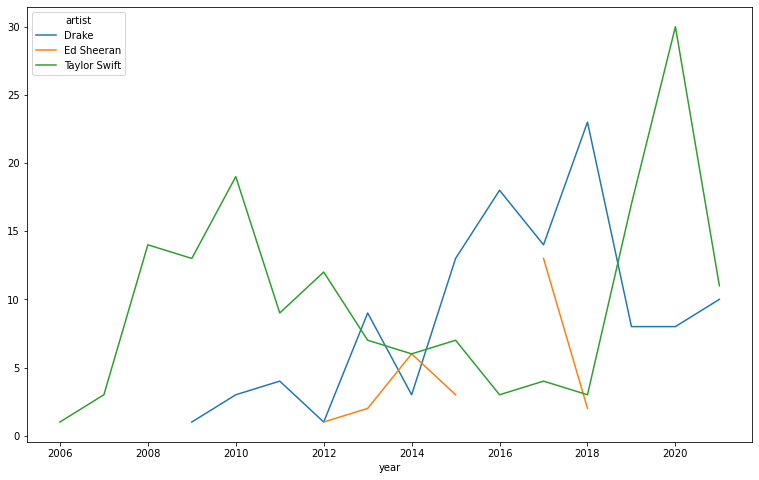

In [18]:
# Vẽ đồ thị
s_top_3_artist_song_count_yearly.pivot('year', 'artist', 'song').plot(figsize=(13,8));

#### Câu 3:

Sắp xếp các bài hát có số tuần liên tiếp đạt top 1 theo thứ tự giảm dần

**Ý nghĩa**: để biết được những bài hát nào có sức ảnh hưởng lớn và liên tục trong một khoảng thời gian dài

**Trả lời**:
- Ta sẽ lọc ra các dòng có rank=1 và last_week=1 (nghĩa là được top 1 liên tiếp)
- Sau đó groupby theo ID để đếm số tuần top 1 liên tiếp, nhưng phải cộng thêm 1 vì tuần đầu tiên được top 1 sẽ có last_week!=1
- Tiếp theo sẽ merge với dataframe songs (danh sách các bài hát có trong dataframe billboards) để lấy ra tên và ca sĩ trình bày bài hát
- Cuối cùng là sắp xếp các bài hát theo thứ tự giảm dần số tuần đạt top 1 liên tiếp trên BXH

In [19]:
df = new_billboards.query('rank==1 and last_week==1').groupby('ID')['date'].count() + 1

songs_consecutive_week_top1 = pd.DataFrame(data=df.values, index=df.index, columns=['weeks'])\
                                .reset_index()\
                                .merge(songs, how='inner', on='ID')\
                                .sort_values(by='weeks', ascending=False)\
                                .reset_index(drop=True)

songs_consecutive_week_top1

,ID,weeks,song,artist
0,1332,19,Old Town Road,Lil Nas X Featuring Billy Ray Cyrus
1,2432,16,Despacito,Luis Fonsi & Daddy Yankee Featuring Justin Bieber
2,10367,16,One Sweet Day,Mariah Carey & Boyz II Men
3,4758,14,I Will Always Love You,Whitney Houston
4,10153,14,Macarena (Bayside Boys Mix),Los Del Rio
...,...,...,...,...
704,14338,2,Everything She Wants,Wham!
705,14318,2,Everybody Wants To Rule The World,Tears For Fears
706,14312,2,Heaven,Bryan Adams
707,14297,2,A View To A Kill,Duran Duran


**Nhận xét**:

Kết quả thu được hoàn toàn hợp lý khi mà ta thấy rằng trong kết quả thì các bài hát đứng đầu danh sách như **Old Town Road**, **Despacito**, **One Sweet Day** đều là những bài hát rất hot trong thời điểm ra mắt và có sức ảnh hưởng lớn trên thế giới.

#### Câu 4:
Sắp xếp các bài hát có thời gian vào top 1 nhanh nhất kể từ lúc bắt đầu vào BXH

**Ý nghĩa**: ta sẽ biết được độ hot, tốc độ phủ sóng của các bài hát đó. Tốc độ phủ sóng của các bài hát ở các thập kỷ trước khi internet chưa phát triển có thể thấp hơn so với gần đây?

**Câu trả lời**:

In [20]:
songs = pd.DataFrame(data=billboards, columns=['song', 'artist'])\
            .drop_duplicates()\
            .reset_index(drop=True)\
            .reset_index()\
            .rename(columns={'index': 'song_ID'})

billboards = pd.merge(songs, billboards, how='inner', on=['song', 'artist'])

In [21]:
# Thời điểm đạt top 1 xa nhất
first_top_1 = billboards.loc[billboards['rank'] == 1].groupby('song_ID').agg('last').reset_index().sort_values('song_ID')

# Thời điểm đầu tiên vào BXH
first_on_board = billboards.groupby('song_ID').agg('last').reset_index()
first_on_board = first_on_board.loc[first_on_board['song_ID'].isin(first_top_1['song_ID'])].sort_values('song_ID').reset_index(drop=True)

In [22]:
# Khoảng cách giữa 2 thời điểm
first_top_1['time_to_top_1'] = first_top_1['date'] - first_on_board['date']
first_top_1.sort_values('time_to_top_1', inplace = True)

In [23]:
first_top_1

,song_ID,song,artist,date,rank,last_week,peak_rank,weeks_on_board,year,time_to_top_1
1130,29542,Poor Little Fool,Ricky Nelson,1958-08-04,1,0,1,1,1958,0 days
36,893,Toosie Slide,Drake,2020-04-18,1,0,1,1,2020,0 days
37,933,The Scotts,"THE SCOTTS, Travis Scott & Kid Cudi",2020-05-09,1,0,1,1,2020,0 days
38,966,Trollz,6ix9ine & Nicki Minaj,2020-06-27,1,0,1,1,2020,0 days
308,9428,Doo Wop (That Thing),Lauryn Hill,1998-11-14,1,0,1,1,1998,0 days
...,...,...,...,...,...,...,...,...,...,...
334,10153,Macarena (Bayside Boys Mix),Los Del Rio,1996-08-03,1,4,1,33,1996,336 days
140,4909,Last Friday Night (T.G.I.F.),Katy Perry,2011-08-27,1,2,1,12,2011,350 days
471,12983,Red Red Wine,UB40,1988-10-15,1,2,1,25,1988,1722 days
461,12900,When I'm With You,Sheriff,1989-02-04,1,2,1,18,1989,2093 days
